In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import tensorflow as tf

In [5]:
N = 5000
H = 2

# Create color maps
cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF', '#FF0000'])

In [6]:
X = np.sign(np.random.randn(N, 2))
y = np.logical_xor((1+X[:,0])//2, (1+X[:,1])//2).astype(dtype=np.float32)
X = X + 0.1*np.random.randn(N, 2)

[1. 0. 1. 1. 0. 0. 0. 1. 0. 1.]


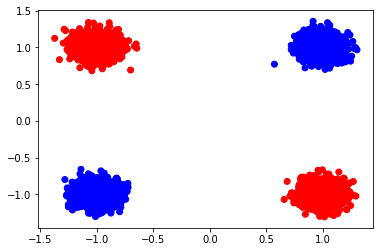

In [7]:
print(y[0:10])
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold)
plt.savefig('xor_orig.png')

In [8]:
x_in = tf.keras.Input(shape=(2,))

h = tf.keras.layers.Dense(H)(x_in)
h = tf.keras.layers.Activation('tanh')(h)

x_out = tf.keras.layers.Dense(1, use_bias=True)(h)
x_out = tf.keras.layers.Activation('sigmoid')(x_out)

model = tf.keras.Model(inputs=x_in, outputs=x_out)

opt = tf.keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

hidden = tf.keras.Model(inputs=x_in, outputs=h)
hidden.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(X, y, epochs=10, verbose=1)

Epoch 1/10
5000/5000 [==============================] - 0s 91us/step - loss: 0.5152 - acc: 0.8084
Epoch 2/10
5000/5000 [==============================] - 0s 36us/step - loss: 0.1768 - acc: 1.0000
Epoch 3/10
5000/5000 [==============================] - 0s 37us/step - loss: 0.0807 - acc: 1.0000
Epoch 4/10
5000/5000 [==============================] - 0s 43us/step - loss: 0.0473 - acc: 1.0000
Epoch 5/10
5000/5000 [==============================] - 0s 39us/step - loss: 0.0315 - acc: 1.0000
Epoch 6/10
5000/5000 [==============================] - 0s 38us/step - loss: 0.0226 - acc: 1.0000
Epoch 7/10
5000/5000 [==============================] - 0s 38us/step - loss: 0.0171 - acc: 1.0000
Epoch 8/10
5000/5000 [==============================] - 0s 44us/step - loss: 0.0134 - acc: 1.0000
Epoch 9/10
5000/5000 [==============================] - 0s 37us/step - loss: 0.0108 - acc: 1.0000
Epoch 10/10
5000/5000 [==============================] - 0s 38us/step - loss: 0.0089 - acc: 1.0000


-1.3735815086184329 1.3044277398804311 -1.306016386664824 1.357115201263729


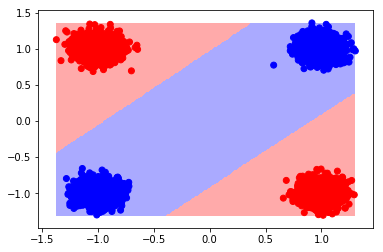

In [10]:
step = 0.01

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() , X[:, 0].max() 
y_min, y_max = X[:, 1].min() , X[:, 1].max() 
print(x_min, x_max, y_min, y_max)
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))
Z = np.round(model.predict(np.c_[xx.ravel(), yy.ravel()]))


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold)
#plt.savefig('xor.png')

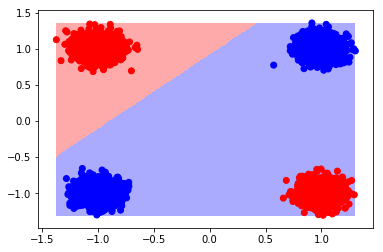

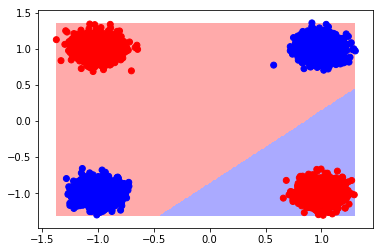

In [11]:
step = 0.01

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() , X[:, 0].max() 
y_min, y_max = X[:, 1].min() , X[:, 1].max() 
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))
Z = np.sign(hidden.predict(np.c_[xx.ravel(), yy.ravel()]))
for i in range(H):

    z = Z[:,i]
    z = z.reshape(xx.shape)
    # Put the result into a color plot
    plt.figure()
    plt.pcolormesh(xx, yy, z, cmap=cmap_light)

    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold)
#     plt.savefig(f'xor_{i}.png')

In [3]:
N = 1000
H = 5

# Create color maps
cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA', '#AAFFAA', '#FFFFAA', '#AAFFFF'])
cmap_bold = ListedColormap(['#0000FF', '#FF0000', '#00FF00', '#FFFF00', '#00FFFF'])